### Question: Are customers with online security features less likely to churn? (i.e, churn proportion of customers without online security features are higher than those with security features by more than 10%)


#### Expectations:
This question aims to understand the relationship between online security features and customer churn, and to explore the potential benefits of offering online security features as a customer retention initiative.
Overall, the goal of this question is to provide insights into the factors that contribute to customer churn and to identify potential strategies for reducing churn rates and improving customer retention.

#### Information about the data:
The data is stored in an Excel file named `Telco_customer_churn.xlsx`. The file contains 7043 rows. Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The features we are interested in are:
- `Online Security`: (Yes, No, No internet service)
- `Churn Value`: Whether the customer churned or not (1 for yes and 0 for no)

### EDA:

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import t

In [6]:
# read the dataset
dataset = pd.read_excel('../Dataset/Telco_customer_churn.xlsx')

In [7]:
dataset.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [8]:
# taking only the required columns which are Online Security and Churn Value
dataset = dataset[['Online Security','Churn Value']]

In [9]:
# checking for null values
dataset.isnull().sum()

Online Security    0
Churn Value        0
dtype: int64

In [10]:
dataset.dtypes

Online Security    object
Churn Value         int64
dtype: object

In [19]:
# checking the unique values in the Online Security column
dataset['Online Security'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

##### We are only interested in poeple who have internet service so we will drop the rows where `Online Security` is `No internet service`:

In [20]:
# drop rows with Online Security as No internet service
dataset = dataset[dataset['Online Security'] != 'No internet service']

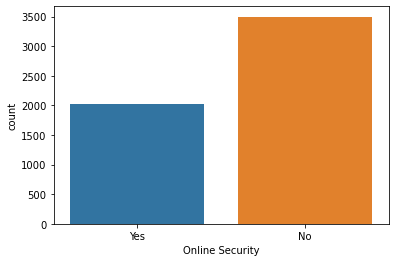

<AxesSubplot:xlabel='Churn Value', ylabel='count'>

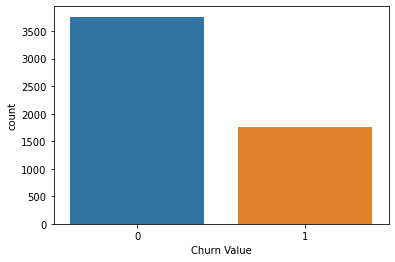

In [21]:
# visualize the distribution of the Online Security
sns.countplot(x='Online Security', data=dataset)
plt.show()

# visualize the distribution of the Churn Value
sns.countplot(x='Churn Value', data=dataset)


Churn Value              0          1
Online Security                      
No               58.233276  41.766724
Yes              85.388806  14.611194


<AxesSubplot:xlabel='Online Security'>

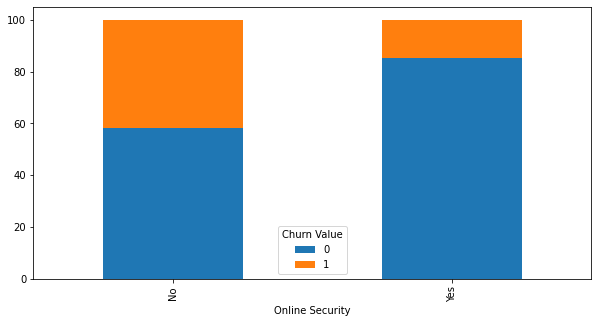

In [22]:
# calculate the proportion of churn value for each category of Online Security
security_churn = dataset.groupby('Online Security')['Churn Value'].value_counts(normalize=True).mul(100).unstack()

print(security_churn)

# visualize the proportion of churn value for each category of Online Security
security_churn.plot(kind='bar', stacked='True', figsize=(10,5))

<AxesSubplot:xlabel='Online Security', ylabel='count'>

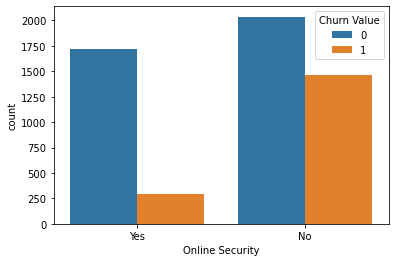

In [23]:
# visualizing the distribution of all Online Security vs churn value
sns.countplot(x='Online Security', hue='Churn Value', data=dataset)

In [24]:
# separate each category of Online Security with its churn value
no = dataset[dataset['Online Security'] == 'No']
yes = dataset[dataset['Online Security'] == 'Yes']

##### Initial observations:
- There are 7043 rows and 21 columns in the dataset.
- There are no missing values in the dataset.
- relative churn rate for people with online security is less than those without online security. 

### Model Building:

##### Defining Hypothesis:

- `u1` = proportion of customers without online security features who churned, `u2` = proportion of customers with online security features who churned

- Null Hypothesis H0: the **u1-u2 <= 10%**

- Alternative Hypothesis H1: **the u1-u2 > 10%**

- our significance level is 0.05

In [25]:
# calculate the mean of churn value for each category of Online Security
no_mean = no['Churn Value'].mean()
yes_mean = yes['Churn Value'].mean()

# calculate the variance of churn value for each category of Online Security
no_var = no['Churn Value'].var()
yes_var = yes['Churn Value'].var()

# calculate the sample size
no_n = len(no)
yes_n = len(yes)

# desired difference between the means
diff = 0.1

# calculate the t statistic
t_stat = (no_mean - yes_mean - diff) / np.sqrt((no_var/no_n) + (yes_var/yes_n))

# calculate the degrees of freedom
df = np.floor((no_var/no_n + yes_var/yes_n)**2 / ((no_var/no_n)**2 / (no_n-1) + (yes_var/yes_n)**2 / (yes_n-1)))

# calculate the critical value
cv = t.ppf(1.0 - 0.05, df)

# compare t statistic with critical value
if t_stat < cv:
    print('Retain null hypothesis.')
else:
    print('Reject the null hypothesis')

Reject the null hypothesis


### we managed to reject the null hypothesis and conclude that the churn rate of customers without Online Security is significantly higher `()` than that of customers with Online Security.

In [26]:
# save the dataset in excel format
dataset.to_excel('OnlineSecurity.xlsx', index=False)